# Graph Greenifier Demo
Data centers are becoming an increasingly large contributor to the global carbon footprint. However, because of a lack of tools / guidelines, it has been challenging to optimize data centers for carbon emissions. This is amplified by the fact that running experiments on data centers is both expansive and time consuming. 
To lessen this problem, we propose Graph Greenifier, a tool that can predict the carbon footprint of a data center using simulation. Graph Greenifier is part of Graph Massivizer, a project that is creating a large scale serverless graph processing tool. 

In this demo we are showing the basic functionalities of the Graph Greenfier tool. The demo is split in two parts:

- First, we setup an experiment, and simulate it using the [OpenDC](https://opendc.org/) framework. OpenDC is an event based stochastic data center simulator that is developed by the atlarge research group at the Vrije Universiteit Amsterdam. During the simulation, several performance metrics are gathered. 

- After the simulation, we analyse and visualize the results. Graph-Greenifier provides several tools to make working with the output easier. 

## 1. Traces 

To determine the footprint of a data center, Graph Greenifier requires information on what has to be executed. This information is provided in the form of workload traces. These traces contain information on when each task is submitted, how long they will take to finish, and what their computational requirements are.  
A typical workload contains two files: 
- [meta](resources/workloads/bitbrains-small/trace/meta.parquet), containing general information about the tasks in the workload, such as submission time and duration.
- [trace](resources/workloads/bitbrains-small/trace/trace.parquet), containing detailed information on each task over time, such as the computational requirements during the workload.

In this demo we are using running the [bitbrains-small](resources/workloads/bitbrains-small/) dataset as our workload. The bitbrains-small workload consist of 50 tasks with a runtime ranging from less than 7 days to more than 30 days. 

The workload is enough to determine the energy usage of the data center. However, to determine the carbon emissions, Graph Greenifier requires information about the type of energy that is available to the data center. 
This can be provided using a carbon intensity trace. This trace describes the carbon intensity (the amount of carbon emitted per unit of energy used) during the workload in 15 minute increments. 

In this demo, we assume that our data center is located in the Netherlands, and uses energy directly from the grid. 



## 2. Topology
Aside from the workload that needs to be executed, Graph Greenifier requires information about topology of the data center (all hardware containted in the data center). The topology of a data center can influence its performance and sustainability greatly. It determines which tasks can be run, how efficiently they are run, and if they can be executed in parallel.

The topology of datacenter is provided using a json file. This file defines how many clusters are available, the hosts they contain, and what type of hosts they are. In this demo we compare the performance of two topologies: [small](resources/topologies/small.json) and [large](resources/topologies/large.json) which can both be found in the resources/topologies folder. 

#### Small
Below, the topology of the small data center is shown:

```json
{
    "clusters":
    [
        {
            "name": "C01",
            "hosts" :
            [
                {
                    "name": "H01",
                    "cpu":
                    {
                        "coreCount": 16,
                        "coreSpeed": 3200,
                        "count": 2
                    },
                    "memory": {
                        "memorySize": 128000000
                    }
                }
            ]
        }
    ]
}
```

The small data center contains only a single cluster *C01*, which contains a single host *H01*. Host *H01* constains two CPUs with 16 cores running at 3200 Mhz, and has a memory of 128000000 Bytes.

#### Large
We will compare the performance of the *small* data center, to that of a *large* data center.
The topology of the large data center can be found in [large](resources/topologies/large.json). 

**Exercise 1**:

Can you determine what the available hardware is in the large data center? 


**Exercise 2**:

In the next execise we will try to create our own topology. 
Assume we want to experiment with a data center that has the following features:
- two clusters: *C01* and *C02*
- *CO1* has a single host *H01*
- *H01* has a single cpu which has a 8 cores with a speed of 2,000 Mhz.
- *H01* has 128,000,000 Bytes of memory.
- *C02* has two hosts: *H02* and *H03*
- *H02* has a two cpus with 4 cores and a speed of 1,000.
- *H02* has 12,800,000 Bytes of memory.
- *H03* has a two cpus with 4 cores and a speed of 1,000.
- *H03* has 1,000,000,000 Bytes of memory.

Can you make a topology that represent this data center? Fill the [medium](resources/topologies/medium.json).


___Please answer the questions related to the topologies in the google form___

## 3. Scenario
An experiment is defined using a Scenario. Scenarios describe what the Graph Greenifier should run, and how. In this demo we will use a provided scenario that can be found [here](resources/scenarios/scenario.json). Its content is shown below:

```json
{
    "name": "greenifier-demo",
    "topologies": [{
            "pathToFile": "resources/topologies/small.json"
        },
        {
            "pathToFile": "resources/topologies/large.json"
        }],
    "workloads": [
        {
            "pathToFile": "resources/workloads/bitbrains-small",
            "type": "ComputeWorkload"
        }
    ],
    "carbonTracePaths": [
        "resources/carbon_intensity.parquet"
    ]
}
```

The scenario file used in this demo defines four variables:
- "name" defines where the ouput files will be stored
- "topologies" define the different topologies that will be used in the experiments
- "workloads" define what workloads will be run
- "carbonTracePaths" define the carbon information used to determined the carbon footprint

From these variables, only the topologies and workloads are required. There are more variables that can further specify a scenario, but they will not be used in this demo. More information on scenarios can be found [here](https://atlarge-research.github.io/opendc/docs/documentation/Input/Scenario).

Note: most of the variables in the scenario file are provided as lists. This makes it possible to run different experiments using the same scenario. Graph Greenifier will run all combinations of variables as seperate experiments. In this demo, we providee two topologies, and a single workload. This means that the same workload will be executed on the both scenarios, resulting in two results.


___Please answer the questions related to the Scenarios in the google form___

## 4. Running
The Graph Greenifier is a terminal tool, which means it can be directly executed from the terminal. However, in this demo we use subprocess to execute the terminal command directly from python 

In [1]:
%%time
import subprocess

pathToScenario = "resources/scenarios/scenario.json"

subprocess.run(["bin/greenifier", "--scenario-path", pathToScenario])



 Running scenario: 0 


Simulating... 100% [=================================] 1/1 (0:00:02 / 0:00:00) 
Simulating...   0% [                                       ] 0/1 (0:00:00 / ?) 



 Running scenario: 1 
CPU times: user 3.72 ms, sys: 8.75 ms, total: 12.5 ms
Wall time: 4.03 s


Simulating... 100% [=================================] 1/1 (0:00:00 / 0:00:00) 


CompletedProcess(args=['bin/greenifier', '--scenario-path', 'resources/scenarios/scenario.json'], returncode=0)

___Please put the total runtime of the experiment in the google form___

## 5. Output
Graph Greenifier outputs three different files containing different information for each experiment saved as parquet files.


The first output file is the host file. This file contains information related to the hosts, such as the cpu utilization or energy usage. 
The second output file is the server file. This file contains information about the executed tasks, such as their uptime.
The final output file is the service file. This file contains overall information, such as how many tasks are running, or how many hosts are currently up.
Further information about the output files can be found [here](https://atlarge-research.github.io/opendc/docs/documentation/Output)

We start by loading the output files directly into pandas DataFrames

In [2]:
import pandas as pd
import numpy as np
import utils
import matplotlib.pyplot as plt

pathToOutput = "output/greenifier-demo"

df_host_small, df_server_small, df_service_small, df_host_large, df_server_large, df_service_large  = utils.get_dataframes(pathToOutput)

### Host
Lets look at the three raw output files. We start with the host output file. The host file contains all information about the host at each timestamp. Examples of metrics contained in this file are cpu_utilization, power_draw, or energy_usage. 

In [3]:
print(f"The host file contains the following columns:\n {np.array(df_host_small.columns)}\n")
print(f"The host file consist of {len(df_host_small)} samples")
df_host_small.head()

The host file contains the following columns:
 ['timestamp' 'absolute_timestamp' 'host_id' 'cpu_count' 'mem_capacity'
 'guests_terminated' 'guests_running' 'guests_error' 'guests_invalid'
 'cpu_limit' 'cpu_usage' 'cpu_demand' 'cpu_utilization' 'cpu_time_active'
 'cpu_time_idle' 'cpu_time_steal' 'cpu_time_lost' 'power_draw'
 'energy_usage' 'carbon_intensity' 'carbon_emission' 'uptime' 'downtime'
 'boot_time']

The host file consist of 60487 samples


,timestamp,absolute_timestamp,host_id,cpu_count,mem_capacity,guests_terminated,guests_running,guests_error,guests_invalid,cpu_limit,...,cpu_time_idle,cpu_time_steal,cpu_time_lost,power_draw,energy_usage,carbon_intensity,carbon_emission,uptime,downtime,boot_time
0,300000,1376314846000,bb20b45f-d4d9-5138-0000-000000000000,1,256000,0,11,0,0,3200.0,...,0,1102143,0,400.0,120000.0,43.004721,1.433491,300000,0,0
1,600000,1376315146000,bb20b45f-d4d9-5138-0000-000000000000,1,256000,0,11,0,0,3200.0,...,0,1028304,0,400.0,120000.0,42.607796,1.420260,300000,0,0
2,900000,1376315446000,bb20b45f-d4d9-5138-0000-000000000000,1,256000,0,11,0,0,3200.0,...,0,1037321,0,400.0,120000.0,42.607796,1.420260,300000,0,0
3,1200000,1376315746000,bb20b45f-d4d9-5138-0000-000000000000,1,256000,0,11,0,0,3200.0,...,0,475418,0,400.0,120000.0,42.607796,1.420260,300000,0,0
4,1500000,1376316046000,bb20b45f-d4d9-5138-0000-000000000000,1,256000,0,11,0,0,3200.0,...,0,454698,0,400.0,120000.0,42.292972,1.409766,300000,0,0


### Servers
The next outpput file we will look at is the server file. In Graph Greenifier tasks are called servers. 
The server file contains all information about the different servers at each timestamp. This file can be used to find out when a task was run, how long it took, and on which host is was executed.

In [4]:
print(f"The server file contains the following columns:\n {np.array(df_server_small.columns)}")
print(f"The server file consist of {len(df_server_small)} samples")
df_server_small.head()

The server file contains the following columns:
 ['timestamp' 'absolute_timestamp' 'server_id' 'server_name' 'host_id'
 'mem_capacity' 'cpu_count' 'cpu_limit' 'cpu_time_active' 'cpu_time_idle'
 'cpu_time_steal' 'cpu_time_lost' 'uptime' 'downtime' 'provision_time'
 'boot_time']
The server file consist of 1598645 samples


,timestamp,absolute_timestamp,server_id,server_name,host_id,mem_capacity,cpu_count,cpu_limit,cpu_time_active,cpu_time_idle,cpu_time_steal,cpu_time_lost,uptime,downtime,provision_time,boot_time
0,300000,1376314846000,00000000-0000-0000-06c4-5d188009454f,1019,bb20b45f-d4d9-5138-0000-000000000000,181,1,3200.0,0,328,0,0,300000,0,0,0.0
1,300000,1376314846000,00000000-0000-0000-1b39-896a51a8749b,1023,bb20b45f-d4d9-5138-0000-000000000000,260,1,3200.0,0,328,0,0,300000,0,0,0.0
2,300000,1376314846000,00000000-0000-0000-2c82-9abe1f4532e1,1026,bb20b45f-d4d9-5138-0000-000000000000,250,1,3200.0,2,325,0,0,300000,0,0,0.0
3,300000,1376314846000,00000000-0000-0000-3ee5-789041c98ac3,1129,bb20b45f-d4d9-5138-0000-000000000000,125,1,3200.0,0,327,0,0,300000,0,0,0.0
4,300000,1376314846000,00000000-0000-0000-657e-ecdd3cb13d09,1138,bb20b45f-d4d9-5138-0000-000000000000,157,1,3200.0,2,366,0,0,300000,0,0,0.0


### Service

Finally, we look at the service output file. 
The service file contains genaral information about the data center. 
The service file can be used to determine how many tasks are running or if hosts are up. 

In [5]:
print(f"The service file contains the following columns:\n {np.array(df_service_small.columns)}")
print(f"The service file consist of {len(df_service_small)} samples")
df_service_small.head()

The service file contains the following columns:
 ['timestamp' 'absolute_timestamp' 'hosts_up' 'hosts_down'
 'servers_pending' 'servers_active' 'attempts_success' 'attempts_failure'
 'attempts_error']
The service file consist of 60487 samples


,timestamp,absolute_timestamp,hosts_up,hosts_down,servers_pending,servers_active,attempts_success,attempts_failure,attempts_error
0,300000,1376314846000,1,0,33,11,11,0,0
1,600000,1376315146000,1,0,33,11,11,0,0
2,900000,1376315446000,1,0,33,11,11,0,0
3,1200000,1376315746000,1,0,33,11,11,0,0
4,1500000,1376316046000,1,0,33,11,11,0,0


___Please answer the questions related to the Output in the google form___

## 6. Aggregated results

To properly compare the different experiments, we would like to aggregate to aggregate them into meaningfull values.
Below we see an example how to do this using pandas directly. In this example we count the average power draw of a hosts during the workload. 

In [6]:
power_draw_small = df_host_small["power_draw"].mean()
power_draw_large = df_host_large["power_draw"].mean()

print(f"In the small data center, hosts draw {power_draw_small:.2f} Watt of power on average")
print(f"In the large data center, hosts draw {power_draw_large:.2f} Watt of power on average")

In the small data center, hosts draw 327.42 Watt of power on average
In the large data center, hosts draw 255.74 Watt of power on average


**Exercise 3**:

Can you determine the average number of guests running on a host?  

In [7]:
# Put your code here
power_draw_small = df_host_small["guests_running"].mean()
power_draw_large = df_host_large["guests_running"].mean()

print(f"In the small data center, hosts have {power_draw_small:.2f} number of guests on average")
print(f"In the large data center, hosts have {power_draw_large:.2f} number of guests on average")

In the small data center, hosts have 6.68 number of guests on average
In the large data center, hosts have 2.60 number of guests on average


### Runtime

Using a bigger data center can significantly descrease the runtime needed for a workload.
We can get the runtimes of the two experiments using the *getTotalRuntime* function

In [8]:
runtime_small = utils.getTotalRuntime(df_service_small)
runtime_large = utils.getTotalRuntime(df_service_large)

print(f"The small data center had a total runtime of {runtime_small}")
print(f"The large data center had a total runtime of {runtime_large}")

The small data center had a total runtime of 210 days 00:29:12
The large data center had a total runtime of 90 days 00:09:12


The small data center takes more than twice as long to finish all tasks compared to the large data center. 
This is unsurprising since the large data center is much larger


### Utilization

A second metric that might be interesting to look at is the utilization of the hardware. 
Data center operators want to control their utilization. If the utilization is too low, it means most machines are idle and thus wasting energy. 
If utilization is too high, it could cause oversubstription of delays when new tasks are submitted.  

In [9]:
utilization_small = utils.getMeanUtilization(df_host_small)
utilization_large = utils.getMeanUtilization(df_host_large)

print(f"On average, the utilization of each host in the small data center is {utilization_small * 100:.2f}%")
print(f"On average, the utilization of each host in the large data center is {utilization_large * 100:.2f}%")

On average, the utilization of each host in the small data center is 63.71%
On average, the utilization of each host in the large data center is 27.87%


The small data center is utilized three times as much as the large data center. 
This is unsurprising since the large data center is much larger and thus has many idle hosts.

In [10]:
waitingtime_small = utils.getMeanWaitTime(df_server_small)
waitingtime_large = utils.getMeanWaitTime(df_server_large)

print(f"In the small data center, tasks had to wait on average {waitingtime_small}")
print(f"In the large data center, tasks had to wait on average {waitingtime_large}")

In the small data center, tasks had to wait on average 82 days 22:32:06
In the large data center, tasks had to wait on average 20 days 12:45:42


### Energy Usage

Finally, we look at the energy used by both data centers. 

In [11]:
energy_small = utils.getTotalEnergyUsage(df_host_small, "kWh")
energy_large = utils.getTotalEnergyUsage(df_host_large, "kWh")

print(f"The small data center used {energy_small:.2f} kWh during the workload")
print(f"The large data center used {energy_large:.2f} kWh during the workload")

The small data center used 1650.37 kWh during the workload
The large data center used 3314.74 kWh during the workload


___Please answer the questions related to the Aggregation in the google form___

## 7. Visualization

While single numbers can be great to compare the different workloads, it does not always indicate the reasons for the difference. 

Similarly to the value aggregation, vizualization can be done directly using the pandas dataframes. 
However, Graph Greenifier also provides several predefined plotting tools to help this process.

### Service

Lets start with plotting general information using the service output file. This can be done using the *plotService* function. 
Below, we plot the number of active servers during the workload. 

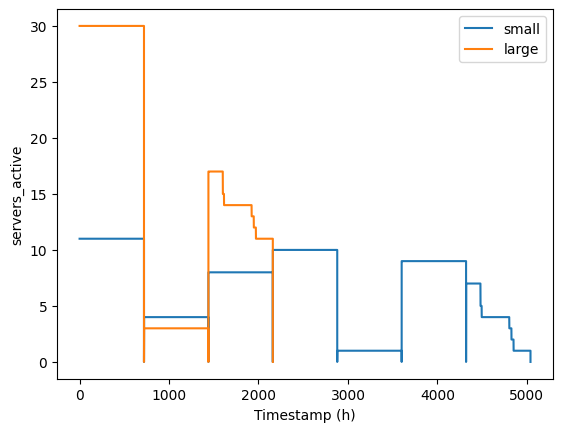

In [12]:
utils.plotService(df_service_small, "servers_active", "small")
utils.plotService(df_service_large, "servers_active", "large")

**Exercise 4**:

Can you use the *plotService* function to plot the number of pending servers during the workload?

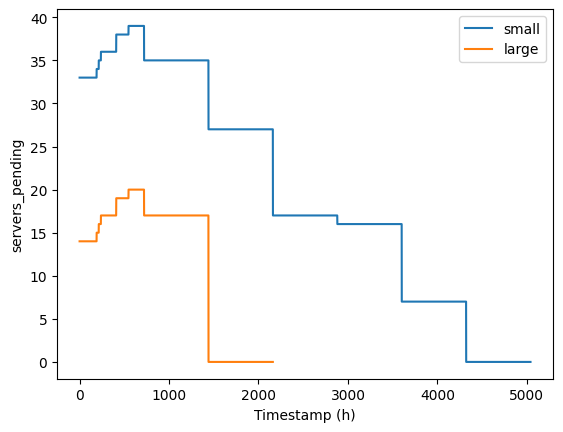

In [13]:
# Put your code here
utils.plotService(df_service_small, "servers_pending", "small")
utils.plotService(df_service_large, "servers_pending", "large")

### Host

Information from the host file can be plotted using the *plotHosts* function. 
This function takes a DataFrame, a column and a method of aggregation. 
At each timestamp, each host is sampled. This means we need some form aggregation to combine the samples.
In the current version, Graph Greenifier supports taking the average, and the sum. 


Below, we plot the cpu utilization during the workload of the small and large data center. 

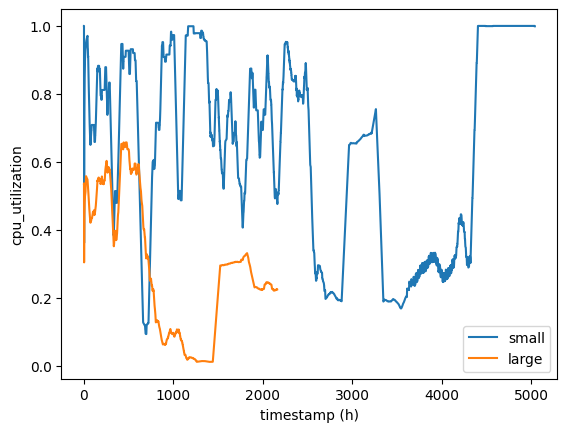

In [14]:
utils.plotHosts(df_host_small, "cpu_utilization", "mean", "small")
utils.plotHosts(df_host_large, "cpu_utilization", "mean", "large")

For some metrics it makes more sense to aggregate the hosts to get the metric of the full data center.
Below we plot the power draw during the workload of each data center. 

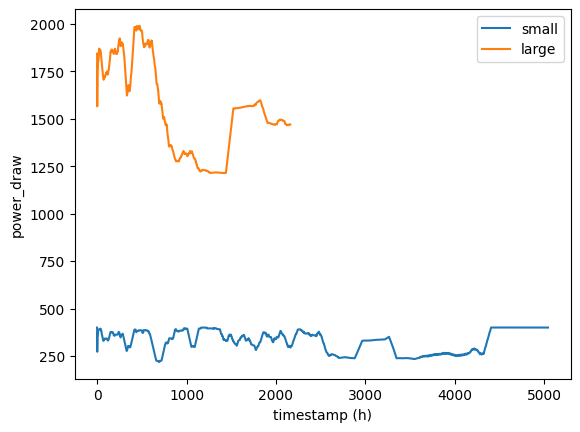

In [15]:
utils.plotHosts(df_host_small, "power_draw", "sum", "small")
utils.plotHosts(df_host_large, "power_draw", "sum", "large")

**Exercise 5**:

Can you use the *plotHosts* function to plot Carbon emission during the workload?

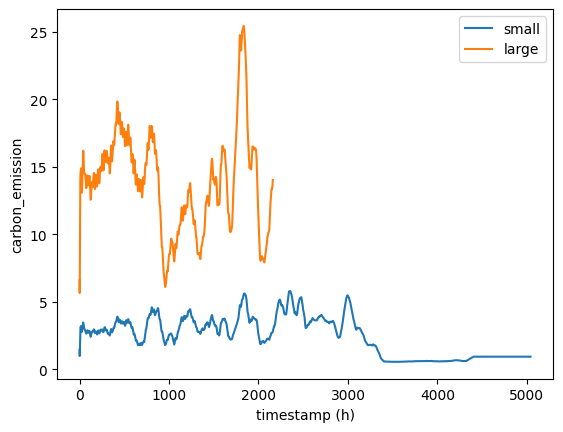

In [16]:
utils.plotHosts(df_host_small, "carbon_emission", "sum", "small")
utils.plotHosts(df_host_large, "carbon_emission", "sum", "large")